### Config

In [3]:
import pandas as pd
import sqlite3
import requests

In [4]:
import mlflow

In [5]:
import datetime
import logging
import json
import time

In [6]:
import api_limit_handler
import api_limit_handler_v2

ModuleNotFoundError: No module named 'api_limit_handler'

In [18]:
import os
from dotenv import load_dotenv

In [19]:
%load_ext autoreload
%autoreload 2

In [20]:
%reload_ext dotenv
%dotenv .env

In [21]:
load_dotenv()

True

In [22]:
# api_limit = api_limit_handler.APILimitHandler()

In [23]:
rapidapi_key = os.getenv('rapidapi-key')
rapidapi_host = os.getenv('rapidapi-host')

In [24]:
log = logging.getLogger(__name__)                                  
# log.setLevel(logging.INFO)   
logging.basicConfig(level=logging.DEBUG, format='%(message)s')

### Load data

In [25]:
headers = {
	'x-rapidapi-key': rapidapi_key,
	'x-rapidapi-host': rapidapi_host
}


In [ ]:
def print_response(response):
    print(json.dumps(response.json(), indent=4))


In [11]:
from ..api_limit_handler_v2 import check_requests, prueba

ImportError: attempted relative import with no known parent package

In [ ]:
# ewe = prueba("a")
# print(ewe)

In [ ]:
league = 140
season = 2022
country = "Spain"

In [ ]:
url = "https://api-football-v1.p.rapidapi.com/v3/teams"

querystring = {"country": country, "league": league, "season": season}

response = requests.get(url, headers=headers, params=querystring)

Starting new HTTPS connection (1): api-football-v1.p.rapidapi.com:443
https://api-football-v1.p.rapidapi.com:443 "GET /v3/teams?country=Spain&league=140&season=2022 HTTP/11" 401 None


In [ ]:
teams = json.loads(response.text).get('response')

In [ ]:
teams_id = [team['team']['id'] for team in teams]

TypeError: 'NoneType' object is not iterable

In [9]:
import pandas as pd


@check_requests
def get_team_info(team_id, query_date):

    url = "https://api-football-v1.p.rapidapi.com/v3/teams/statistics"

    querystring = {"league": 140, "season": 2022, "team": team_id, "date": query_date}

    response = requests.get(url, headers=headers, params=querystring)

    response_content = json.loads(response.text)["response"]

    team_id = response_content["team"]["id"]
    name = response_content["team"]["name"]

    history = response_content["form"]

    total_played = response_content["fixtures"]["played"]["total"]

    wins_home = response_content["fixtures"]["wins"]["home"]
    wins_away = response_content["fixtures"]["wins"]["away"]

    draws_home = response_content["fixtures"]["draws"]["home"]
    draws_away = response_content["fixtures"]["draws"]["away"]

    loses_home = response_content["fixtures"]["loses"]["home"]
    loses_away = response_content["fixtures"]["loses"]["away"]

    goals_for_home = response_content["goals"]["for"]["total"]["home"]
    goals_for_away = response_content["goals"]["for"]["total"]["away"]

    goals_against_home = response_content["goals"]["against"]["total"]["home"]
    goals_against_away = response_content["goals"]["against"]["total"]["away"]

    return (
        team_id,
        query_date,
        name,
        history,
        total_played,
        wins_home,
        wins_away,
        draws_home,
        draws_away,
        loses_home,
        loses_away,
        goals_for_home,
        goals_for_away,
        goals_against_home,
        goals_against_away,
    )

NameError: name 'check_requests' is not defined

In [ ]:
query_date = "2022-08-18"

In [ ]:
#TODO
first_match_date = datetime.date(2022,8,11)
last_match_date =  datetime.date(2023,6,10)

In [ ]:
# Get all wednesdays of a year
diff_to_wednesday = (7 - 5 - first_match_date.weekday()) % 7

# print(diff_to_wednesday)

if diff_to_wednesday > 0 :
    first_wednesday = first_match_date + datetime.timedelta(diff_to_wednesday)
else:
    first_wednesday = first_match_date - datetime.timedelta(diff_to_wednesday)

new_date = first_wednesday
wednesdays = []
while new_date < last_match_date:
    wednesdays.append(new_date)
    new_date = new_date + datetime.timedelta(7)

In [ ]:
#TODO: lanzar quitando los equipos ya cargados al completo

In [ ]:
# Load current data
with sqlite3.connect('soccer.db') as conn:
    teams_db = pd.read_sql('select * from teams', conn)

data_retrieved = teams_db[(teams_db["team_id"]==529) & (teams_db["query_date"]=="2022-09-07")]

In [ ]:
len(wednesdays)

43

In [ ]:
# Load current data
with sqlite3.connect('soccer.db') as conn:
    teams_db = pd.read_sql('select * from teams', conn)

teams = {}
for team_id in teams_id:
    team_data = {}
    for query_date in wednesdays[3:]:
        print(" = ")
        data_retrieved = teams_db[(teams_db["team_id"]==team_id) & (teams_db["query_date"]==str(query_date))]
        # print(data_retrieved)
        # If data is not available at db, get it
        if data_retrieved.empty:
            print(f"Data needed for team {team_id} and query date {query_date}")
            team_data[query_date] = get_team_info(team_id, query_date)
            time.sleep(5)
    teams[team_id] = team_data

 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 


In [ ]:
team_data

NameError: name 'team_data' is not defined

In [ ]:
for team, team_data in teams.items():
    df_teams = pd.DataFrame.from_dict(
        team_data,
        orient="index",
        columns=[
            "team_id",
            "query_date",
            "name",
            "history",
            "total_played",
            "wins_home",
            "wins_away",
            "draws_home",
            "draws_away",
            "loses_home",
            "loses_away",
            "goals_for_home",
            "goals_for_away",
            "goals_against_home",
            "goals_against_away",
        ],
    )
    with sqlite3.connect('soccer.db') as conn:
        df_teams.to_sql(name="teams", con=conn, if_exists="append", index=False)

In [ ]:
# teams = {}
# for team_id in teams_id:
#     team_data = {}
#     for query_date in wednesdays[3:5]:
#         team_data[query_date] = get_team_info(team_id, query_date)
#         time.sleep(5)
#     teams[team_id] = team_data

In [26]:
url = "https://api-football-v1.p.rapidapi.com/v3/fixtures/rounds"

querystring = {"league":140, "season": 2022}

response = requests.get(url, headers=headers, params=querystring)

rounds = json.loads(response.text).get('response')

Starting new HTTPS connection (1): api-football-v1.p.rapidapi.com:443
https://api-football-v1.p.rapidapi.com:443 "GET /v3/fixtures/rounds?league=140&season=2022 HTTP/11" 200 None


In [ ]:
# rs = [re.search('Regular Season - (\d+)', round).group(1) for round in r]

In [ ]:
# rounds = ['Regular Season - 32', 'Regular Season - 33', 'Regular Season - 34']

In [27]:
rounds

['Regular Season - 1',
 'Regular Season - 2',
 'Regular Season - 3',
 'Regular Season - 4',
 'Regular Season - 5',
 'Regular Season - 6',
 'Regular Season - 7',
 'Regular Season - 8',
 'Regular Season - 9',
 'Regular Season - 10',
 'Regular Season - 11',
 'Regular Season - 12',
 'Regular Season - 13',
 'Regular Season - 14',
 'Regular Season - 15',
 'Regular Season - 16',
 'Regular Season - 17',
 'Regular Season - 18',
 'Regular Season - 19',
 'Regular Season - 20',
 'Regular Season - 21',
 'Regular Season - 22',
 'Regular Season - 23',
 'Regular Season - 24',
 'Regular Season - 25',
 'Regular Season - 26',
 'Regular Season - 27',
 'Regular Season - 28',
 'Regular Season - 29',
 'Regular Season - 30',
 'Regular Season - 31',
 'Regular Season - 32',
 'Regular Season - 33',
 'Regular Season - 34',
 'Regular Season - 35',
 'Regular Season - 36',
 'Regular Season - 37',
 'Regular Season - 38']

In [28]:
rounds = rounds[:3]

In [29]:
rounds

['Regular Season - 1', 'Regular Season - 2', 'Regular Season - 3']

In [12]:
import re

In [39]:
def get_round_info(round, league=140, season=2022):
    querystring = {"league":league, "season": season, "round" : round}
    url = "https://api-football-v1.p.rapidapi.com/v3/fixtures"
    response = requests.get(url, headers=headers, params=querystring)
    fixtures_round = json.loads(response.text).get('response')

    round_format = re.search('Regular Season - (\d+)', round).group(1)

    log.info(f" ===== Loading round {round_format} =====")

    data_fixtures_round = []
    # For each home, get both teams id
    for fixture in fixtures_round[:1]:
        print(fixture)

        match_datetime = fixture["fixture"]["date"]

        home_id = fixture["teams"]["home"]["id"]
        away_id = fixture["teams"]["away"]["id"]

        home_win = fixture["teams"]["home"]["winner"]
        away_win = fixture["teams"]["away"]["winner"]

        result = ""
        if home_win == True:
            result = "home_win"
        elif away_win == True:
            result = "away_win"
        else:
            result = "draw"
        data_fixtures_round.append([round_format, match_datetime, home_id, away_id, None, result])
    
    time.sleep(5)
    return data_fixtures_round

In [ ]:
{
    "fixture": {
        "id": 877952,
        "referee": "César Soto",
        "timezone": "UTC",
        "date": "2022-08-21T15:30:00+00:00",
        "timestamp": 1661095800,
        "periods": {"first": 1661095800, "second": 1661099400},
        "venue": {"id": 1460, "name": "San Mamés Barria", "city": "Bilbao"},
        "status": {"long": "Match Finished", "short": "FT", "elapsed": 90},
    },
    "league": {
        "id": 140,
        "name": "La Liga",
        "country": "Spain",
        "logo": "https://media.api-sports.io/football/leagues/140.png",
        "flag": "https://media.api-sports.io/flags/es.svg",
        "season": 2022,
        "round": "Regular Season - 2",
    },
    "teams": {
        "home": {
            "id": 531,
            "name": "Athletic Club",
            "logo": "https://media.api-sports.io/football/teams/531.png",
            "winner": True,
        },
        "away": {
            "id": 532,
            "name": "Valencia",
            "logo": "https://media.api-sports.io/football/teams/532.png",
            "winner": False,
        },
    },
    "goals": {"home": 1, "away": 0},
    "score": {
        "halftime": {"home": 1, "away": 0},
        "fulltime": {"home": 1, "away": 0},
        "extratime": {"home": None, "away": None},
        "penalty": {"home": None, "away": None},
    },
}

In [40]:
data_fixtures = []

for round in rounds:
    round_data = get_round_info(round)
    data_fixtures.extend(round_data)

Starting new HTTPS connection (1): api-football-v1.p.rapidapi.com:443
https://api-football-v1.p.rapidapi.com:443 "GET /v3/fixtures?league=140&season=2022&round=Regular+Season+-+1 HTTP/11" 200 None
 ===== Loading round 1 =====


{'fixture': {'id': 877942, 'referee': 'Javier Iglesias', 'timezone': 'UTC', 'date': '2022-08-15T15:30:00+00:00', 'timestamp': 1660577400, 'periods': {'first': 1660577400, 'second': 1660581000}, 'venue': {'id': 1460, 'name': 'San Mamés Barria', 'city': 'Bilbao'}, 'status': {'long': 'Match Finished', 'short': 'FT', 'elapsed': 90}}, 'league': {'id': 140, 'name': 'La Liga', 'country': 'Spain', 'logo': 'https://media.api-sports.io/football/leagues/140.png', 'flag': 'https://media.api-sports.io/flags/es.svg', 'season': 2022, 'round': 'Regular Season - 1'}, 'teams': {'home': {'id': 531, 'name': 'Athletic Club', 'logo': 'https://media.api-sports.io/football/teams/531.png', 'winner': None}, 'away': {'id': 798, 'name': 'Mallorca', 'logo': 'https://media.api-sports.io/football/teams/798.png', 'winner': None}}, 'goals': {'home': 0, 'away': 0}, 'score': {'halftime': {'home': 0, 'away': 0}, 'fulltime': {'home': 0, 'away': 0}, 'extratime': {'home': None, 'away': None}, 'penalty': {'home': None, 'away

Starting new HTTPS connection (1): api-football-v1.p.rapidapi.com:443
https://api-football-v1.p.rapidapi.com:443 "GET /v3/fixtures?league=140&season=2022&round=Regular+Season+-+2 HTTP/11" 200 None
 ===== Loading round 2 =====


{'fixture': {'id': 877952, 'referee': 'César Soto', 'timezone': 'UTC', 'date': '2022-08-21T15:30:00+00:00', 'timestamp': 1661095800, 'periods': {'first': 1661095800, 'second': 1661099400}, 'venue': {'id': 1460, 'name': 'San Mamés Barria', 'city': 'Bilbao'}, 'status': {'long': 'Match Finished', 'short': 'FT', 'elapsed': 90}}, 'league': {'id': 140, 'name': 'La Liga', 'country': 'Spain', 'logo': 'https://media.api-sports.io/football/leagues/140.png', 'flag': 'https://media.api-sports.io/flags/es.svg', 'season': 2022, 'round': 'Regular Season - 2'}, 'teams': {'home': {'id': 531, 'name': 'Athletic Club', 'logo': 'https://media.api-sports.io/football/teams/531.png', 'winner': True}, 'away': {'id': 532, 'name': 'Valencia', 'logo': 'https://media.api-sports.io/football/teams/532.png', 'winner': False}}, 'goals': {'home': 1, 'away': 0}, 'score': {'halftime': {'home': 1, 'away': 0}, 'fulltime': {'home': 1, 'away': 0}, 'extratime': {'home': None, 'away': None}, 'penalty': {'home': None, 'away': N

Starting new HTTPS connection (1): api-football-v1.p.rapidapi.com:443
https://api-football-v1.p.rapidapi.com:443 "GET /v3/fixtures?league=140&season=2022&round=Regular+Season+-+3 HTTP/11" 200 None
 ===== Loading round 3 =====


{'fixture': {'id': 877962, 'referee': 'Ricardo De Burgos', 'timezone': 'UTC', 'date': '2022-08-28T17:30:00+00:00', 'timestamp': 1661707800, 'periods': {'first': 1661707800, 'second': 1661711400}, 'venue': {'id': 18630, 'name': 'Spotify Camp Nou', 'city': 'Barcelona'}, 'status': {'long': 'Match Finished', 'short': 'FT', 'elapsed': 90}}, 'league': {'id': 140, 'name': 'La Liga', 'country': 'Spain', 'logo': 'https://media.api-sports.io/football/leagues/140.png', 'flag': 'https://media.api-sports.io/flags/es.svg', 'season': 2022, 'round': 'Regular Season - 3'}, 'teams': {'home': {'id': 529, 'name': 'Barcelona', 'logo': 'https://media.api-sports.io/football/teams/529.png', 'winner': True}, 'away': {'id': 720, 'name': 'Valladolid', 'logo': 'https://media.api-sports.io/football/teams/720.png', 'winner': False}}, 'goals': {'home': 4, 'away': 0}, 'score': {'halftime': {'home': 2, 'away': 0}, 'fulltime': {'home': 4, 'away': 0}, 'extratime': {'home': None, 'away': None}, 'penalty': {'home': None, 

In [41]:
round

'Regular Season - 3'

In [42]:
data_fixtures

[['1', '2022-08-15T15:30:00+00:00', 531, 798, None, 'draw'],
 ['2', '2022-08-21T15:30:00+00:00', 531, 532, None, 'home_win'],
 ['3', '2022-08-28T17:30:00+00:00', 529, 720, None, 'home_win']]

In [43]:
df_fixtures = pd.DataFrame(data_fixtures, columns=["fixture", "match_date", "team_home", "team_away", "result_predict", "result_real"])

In [44]:
df_fixtures

,fixture,match_date,team_home,team_away,result_predict,result_real
0,1,2022-08-15T15:30:00+00:00,531,798,None,draw
1,2,2022-08-21T15:30:00+00:00,531,532,None,home_win
2,3,2022-08-28T17:30:00+00:00,529,720,None,home_win


In [45]:
with db.connect() as conn:
    df_fixtures.to_sql(name="matches", con=conn, if_exists="replace", index=False)

### Read and join data

In [12]:
# Clean db data (Remove duplicates)
# with sqlite3.connect('soccer.db') as conn:
#     matches = pd.read_sql(f"""
#                                SELECT *
#                                FROM matches
#                                """, con=conn)
#     matches.drop_duplicates(subset=["fixture", "team_home", "team_away"]) \
#             .to_sql(name="matches", con=conn, if_exists="replace", index=False)
    
# with sqlite3.connect('soccer.db') as conn:
#     teams = pd.read_sql(f"""
#                                SELECT *
#                                FROM teams
#                                """, con=conn)
#     teams.drop_duplicates(subset=["team_id", "query_date"]) \
#             .to_sql(name="teams", con=conn, if_exists="replace", index=False)
    
    

In [13]:
with sqlite3.connect('soccer.db') as conn:
    available_fixtures = pd.read_sql(f"""
                               SELECT DISTINCT(fixture)
                               FROM matches
                               """, con=conn)
available_fixtures = [value[0] for value in available_fixtures.values]

In [14]:
dfs = []
for fixture in available_fixtures:
    with sqlite3.connect('soccer.db') as conn:
        # Get fixture matches data
        df_matches = pd.read_sql(f"""
                                    SELECT *
                                    FROM matches
                                    WHERE fixture={fixture}
                                    """, con=conn)

        # Get teams data (filter by last data available before match date)
        df_teams = pd.read_sql(f"""
                                    SELECT *
                                    FROM teams
                                    WHERE teams.query_date = (
                                        SELECT MAX(teams.query_date)
                                        FROM teams
                                        WHERE teams.query_date <= (
                                            SELECT MAX(matches.match_date)
                                            FROM matches
                                            WHERE fixture = {fixture}
                                        )
                                    )
                                """, con=conn)
    
    

    df_aux = df_matches.merge(df_teams, left_on='team_home', right_on='team_id', how='left', suffixes = (None, "_index_home"))
    df_aux.drop(columns=["team_id", "id_index_home"], axis=1, inplace=True)
    df_aux.columns = [ "home_" + col if ((col in df_teams.columns) and (col != "id")) else col for col in df_aux.columns]

    df_aux = df_aux.merge(df_teams, left_on='team_away', right_on='team_id', how='left', suffixes = (None, "_index_away"))
    df_aux.drop(columns=["team_id", "id_index_away"], axis=1, inplace=True)
    df_aux.columns = [ "away_" + col if ((col in df_teams.columns) and (col != "id")) else col for col in df_aux.columns]

    dfs.append(df_aux)

df = pd.concat(dfs)

In [15]:
df_matches

,id,fixture,match_date,team_home,team_away,result_predict,result_real
0,371,38,2023-06-04T19:00:00+00:00,543,532,None,draw
1,372,38,2023-06-04T16:30:00+00:00,798,728,None,home_win
2,373,38,2023-06-04T16:30:00+00:00,548,536,None,home_win
3,374,38,2023-06-04T16:30:00+00:00,541,531,None,draw
4,375,38,2023-06-04T16:30:00+00:00,533,530,None,draw
5,376,38,2023-06-04T19:00:00+00:00,538,529,None,home_win
6,377,38,2023-06-04T19:00:00+00:00,720,546,None,draw
7,378,38,2023-06-04T19:00:00+00:00,797,724,None,draw
8,379,38,2023-06-04T19:00:00+00:00,540,723,None,draw
9,380,38,2023-06-04T16:30:00+00:00,727,547,None,home_win


In [16]:
df.shape

(380, 35)

In [17]:
df.columns

Index(['id', 'fixture', 'match_date', 'team_home', 'team_away',
       'result_predict', 'result_real', 'home_query_date', 'home_name',
       'home_history', 'home_total_played', 'home_wins_home', 'home_wins_away',
       'home_draws_home', 'home_draws_away', 'home_loses_home',
       'home_loses_away', 'home_goals_for_home', 'home_goals_for_away',
       'home_goals_against_home', 'home_goals_against_away', 'away_query_date',
       'away_name', 'away_history', 'away_total_played', 'away_wins_home',
       'away_wins_away', 'away_draws_home', 'away_draws_away',
       'away_loses_home', 'away_loses_away', 'away_goals_for_home',
       'away_goals_for_away', 'away_goals_against_home',
       'away_goals_against_away'],
      dtype='object')

In [18]:
df = df[df["home_name"].notnull() & df["away_name"].notnull() & df["home_history"].notnull() & df["away_history"].notnull()]

In [19]:
df.shape

(358, 35)

### Feature engineering


Features no necesarias para el modelo: id, fixture, result_predict, result_real, query_date_, name_, 

OHE: team_home?, team_away?, result_real

Nada: total_played_, wins_home_, wins_away_away_, draws_home_, draws_away_, loses_home_, goals_for_home_, goals_for_away_, goals_against_home_, goals_against_away_

Otros: history_away_

Siguientes fases: fixture, match_date (día de la semana, mes, etc)

!!! team_id_away

In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pickle

In [21]:
# Drop unnecesary features for model
df.drop(
    columns=[
        "id",
        "fixture",
        "result_predict",
        "home_query_date",
        "away_query_date",
        "home_name",
        "away_name",
        "match_date"
    ],
    axis=1,
    inplace=True,
)

In [22]:
# One hot encoding
# ohe_cols = ["team_home", "team_away", "result_real"]
ohe_cols = ["team_home", "team_away"]
ohe_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

In [23]:
ohe_encoder = ohe_encoder.fit(df[ohe_cols])

In [24]:
with open("ohe_encoder.sav", "wb") as f: 
    pickle.dump(ohe_encoder, f)

In [25]:
ohe_encoded = ohe_encoder.transform(df[ohe_cols])

In [26]:
df = pd.concat([df, ohe_encoded], axis=1).drop(columns=ohe_cols)

In [27]:
df["home_history"] = df["home_history"].apply(lambda x: list(x)[:6])
df["away_history"] = df["away_history"].apply(lambda x: list(x)[:6])

In [28]:
df [["home_last_1", "home_last_2", "home_last_3", "home_last_4", "home_last_5", "home_last_6"]]= df["home_history"].apply(pd.Series)
df [["away_last_1", "away_last_2", "away_last_3", "away_last_4", "away_last_5", "away_last_6"]]= df["away_history"].apply(pd.Series)

In [29]:
df.drop(["home_history", "away_history"], axis=1, inplace=True)

In [30]:
label_cols = ["home_last_1", "home_last_2", "home_last_3", "home_last_4", "home_last_5", "home_last_6", "away_last_1", "away_last_2", "away_last_3", "away_last_4", "away_last_5", "away_last_6"]

In [31]:
df.replace({"L":0, "D":1, "W":2}, inplace=True)

C:\Users\josem\AppData\Local\Temp\ipykernel_14732\3005481430.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"L":0, "D":1, "W":2}, inplace=True)


In [32]:
from sklearn.preprocessing import LabelEncoder

# TODO: label encoder
le = LabelEncoder()
le.fit(df["result_real"])

LabelEncoder()

In [33]:
le.__dict__

{'classes_': array(['away_win', 'draw', 'home_win'], dtype=object)}

In [34]:
df["result_real"] = le.transform(df["result_real"])

In [35]:
# History feature
cols_home_last = ["home_last_1", "home_last_2", "home_last_3", "home_last_4", "home_last_5", "home_last_6"]
cols_away_last = ["away_last_1", "away_last_2", "away_last_3", "away_last_4", "away_last_5", "away_last_6"]

df['home_last_avg'] = df[cols_home_last].mean(axis=1, skipna=True)
df['away_last_avg'] = df[cols_away_last].mean(axis=1, skipna=True)

df.drop(columns=cols_home_last , axis=1, inplace=True)
df.drop(columns=cols_away_last , axis=1, inplace=True)


In [36]:
history_feature = "Avg last 6 matches"

### Train and predict

In [37]:
# !mlflow server --host 127.0.0.1 --port 8080

In [38]:
import mlflow
import dagshub

In [39]:
mlflow.set_tracking_uri("https://dagshub.com/josmunpen/laliga-oracle-dags.mlflow")

In [40]:
dagshub.init(repo_owner='josmunpen', repo_name='laliga-oracle-dags', mlflow=True)

HTTP Request: GET https://dagshub.com/api/v1/user "HTTP/1.1 200 OK"


Accessing as josmunpen

Accessing as josmunpen
HTTP Request: GET https://dagshub.com/api/v1/repos/josmunpen/laliga-oracle-dags "HTTP/1.1 200 OK"
HTTP Request: GET https://dagshub.com/api/v1/user "HTTP/1.1 200 OK"


Initialized MLflow to track repo "josmunpen/laliga-oracle-dags"

Initialized MLflow to track repo "josmunpen/laliga-oracle-dags"


Repository josmunpen/laliga-oracle-dags initialized!

Repository josmunpen/laliga-oracle-dags initialized!


In [41]:
# with mlflow.start_run():
#   mlflow.log_param('parameter name', 'value')
#   mlflow.log_metric('metric name', 1)

In [42]:
# mlflow.login()

In [43]:
# Set our tracking server uri for logging
# mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# Create a new MLflow Experiment
mlflow.set_experiment("LaLiga Oracle")

Starting new HTTPS connection (1): dagshub.com:443
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/experiments/get-by-name?experiment_name=LaLiga+Oracle HTTP/11" 200 None


<Experiment: artifact_location='mlflow-artifacts:/620ba81b100844bd829f3fedcdac3aab', creation_time=1722893275449, experiment_id='2', last_update_time=1722893275449, lifecycle_stage='active', name='LaLiga Oracle', tags={}>

In [44]:
from sklearn import metrics
# from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, learning_curve

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV


from sklearn.neighbors import KNeighborsClassifier;
from sklearn.svm import SVC;

from mlflow.models import infer_signature

import secrets

In [45]:
# Split by target variable
target_variable = "result_real"

X, y = df.loc[:, df.columns != target_variable], df[target_variable]

In [46]:
# Scale
scaled = False
if scaled == True:
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [47]:
num_samples = len(X)

In [48]:
classifiers = [
            (LogisticRegression(max_iter=10000, ), 'logistic_regression'),
            (KNeighborsClassifier(1), 'knn_1'),
            (KNeighborsClassifier(3), 'knn_3'),
            (KNeighborsClassifier(5), 'knn_5'),
            (KNeighborsClassifier(15), 'knn_15'),
            (KNeighborsClassifier(25), 'knn_25'),
            (KNeighborsClassifier(50), 'knn_50'),
            (DecisionTreeClassifier(), 'decision_tree'),
            (RandomForestClassifier(n_estimators=10), 'rfc_10'),
            (RandomForestClassifier(n_estimators=100), 'rfc_100'),
            (RandomForestClassifier(n_estimators=1000), 'rfc_1000'),
            (GradientBoostingClassifier(),'gbr'),
            (xgb.XGBClassifier(), 'xgb')
              #TODO: EXTREME GRADIENT BOOSTING         
]

In [49]:
def track_model(classifier, classifier_name, log_model=True, **kwargs):
    model_metrics = kwargs.get("model_metrics")
    model_metrics.pop("confusion_matrix")
    params = kwargs.get("params")
    tags = kwargs.get("tags")
    model_data = kwargs.get("model_data")
    figures = kwargs.get("figures")


    # Start an MLflow run
    with mlflow.start_run():
        mlflow.set_tag("mlflow.runName", f"{classifier_name}_{secrets.token_hex(16)}")

        # Log metrics
        if model_metrics:
            mlflow.log_metrics(model_metrics)

        # Log params
        if params:
            mlflow.log_params(params)
        # size, scale, history          

        if figures:
            for name, fig in figures.items():
                mlflow.log_figure(fig, "confusion_matrix.png")

        # Infer the model signature
        # signature = infer_signature(X, classifier.predict(X))

        # Log the model
        if log_model:
            model_info = mlflow.sklearn.log_model(
                # sk_model=classifier,
                artifact_path=classifier_name,
                # signature=signature,
                input_example=X,
                registered_model_name=classifier_name)

In [50]:
import matplotlib.pyplot as plt
def evaluate_classifier(classifier, X, y):
    start = time.time()
    y_pred = cross_val_predict(classifier, X, y, cv=10)
    y_pred_proba = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')
    acc = metrics.accuracy_score(y, y_pred)
    precision = metrics.precision_score(y, y_pred, average="macro")
    recall = metrics.recall_score(y, y_pred, average="macro")
    f1 = metrics.f1_score(y,y_pred, average="macro")
    # roc = metrics.roc_auc_score(y, y_pred_proba[:,1], average="macro", multi_class="ovo")
    cm = metrics.confusion_matrix(y, y_pred)
    end = time.time()

    model_metrics = {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1, "confusion_matrix": cm, "elapsed_time": end-start}


    return model_metrics

matplotlib data path: c:\Users\josem\ds\laliga-oracle\env_laliga\Lib\site-packages\matplotlib\mpl-data
CONFIGDIR=C:\Users\josem\.matplotlib
interactive is False
platform is win32
CACHEDIR=C:\Users\josem\.matplotlib
Using fontManager instance from C:\Users\josem\.matplotlib\fontlist-v390.json


Training logistic_regression


Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='c:\\Users\\josem\\ds\\laliga-oracle\\env_laliga\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
findfont: score(FontEntry(fname='c:\\Users\\josem\\ds\\laliga-oracle\\env_laliga\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='c:\\Users\\josem\\ds\\laliga-oracle\\env_laliga\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', vari

Training knn_1


locator: <matplotlib.ticker.AutoLocator object at 0x000002601A2DA950>
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/create HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/set-tag HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/get?run_uuid=a005e2f0a66246818aae2a607b455301&run_id=a005e2f0a66246818aae2a607b455301 HTTP/11" 200 None
https://dagshub.com:443 "PUT /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts/620ba81b100844bd829f3fedcdac3aab/a005e2f0a66246818aae2a607b455301/artifacts/confusion_matrix.png HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/ap

Training knn_3


https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/create HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/set-tag HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/get?run_uuid=959f24fc973c4b889ce9280af8e2bed2&run_id=959f24fc973c4b889ce9280af8e2bed2 HTTP/11" 200 None
https://dagshub.com:443 "PUT /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts/620ba81b100844bd829f3fedcdac3aab/959f24fc973c4b889ce9280af8e2bed2/artifacts/confusion_matrix.png HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/update HTTP/11" 200 None
locator: <matplotlib.ticker

Training knn_5


https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/create HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/set-tag HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/get?run_uuid=23abb3c09fa646a6b6ba4ee0512c1959&run_id=23abb3c09fa646a6b6ba4ee0512c1959 HTTP/11" 200 None
https://dagshub.com:443 "PUT /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts/620ba81b100844bd829f3fedcdac3aab/23abb3c09fa646a6b6ba4ee0512c1959/artifacts/confusion_matrix.png HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/update HTTP/11" 200 None
locator: <matplotlib.ticker

Training knn_15


https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/create HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/set-tag HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/get?run_uuid=3d98ac6ae3b74598aea2305d6d0854c4&run_id=3d98ac6ae3b74598aea2305d6d0854c4 HTTP/11" 200 None
https://dagshub.com:443 "PUT /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts/620ba81b100844bd829f3fedcdac3aab/3d98ac6ae3b74598aea2305d6d0854c4/artifacts/confusion_matrix.png HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/update HTTP/11" 200 None
locator: <matplotlib.ticker

Training knn_25


https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/create HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/set-tag HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/get?run_uuid=a619b69b791949d08224c0c7c5daf4e4&run_id=a619b69b791949d08224c0c7c5daf4e4 HTTP/11" 200 None
https://dagshub.com:443 "PUT /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts/620ba81b100844bd829f3fedcdac3aab/a619b69b791949d08224c0c7c5daf4e4/artifacts/confusion_matrix.png HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/update HTTP/11" 200 None
locator: <matplotlib.ticker

Training knn_50


https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/create HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/set-tag HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/get?run_uuid=c31381bf9938453e8b9b12f71f4da38e&run_id=c31381bf9938453e8b9b12f71f4da38e HTTP/11" 200 None
https://dagshub.com:443 "PUT /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts/620ba81b100844bd829f3fedcdac3aab/c31381bf9938453e8b9b12f71f4da38e/artifacts/confusion_matrix.png HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/update HTTP/11" 200 None
locator: <matplotlib.ticker

Training decision_tree


https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/create HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/set-tag HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/get?run_uuid=af4c2823cf474a8dbdb36bbefee775a9&run_id=af4c2823cf474a8dbdb36bbefee775a9 HTTP/11" 200 None
https://dagshub.com:443 "PUT /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts/620ba81b100844bd829f3fedcdac3aab/af4c2823cf474a8dbdb36bbefee775a9/artifacts/confusion_matrix.png HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/update HTTP/11" 200 None


Training rfc_10


locator: <matplotlib.ticker.AutoLocator object at 0x000002601C045750>
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/create HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/set-tag HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/get?run_uuid=ce82894e381342cfa5462871cf74865e&run_id=ce82894e381342cfa5462871cf74865e HTTP/11" 200 None
https://dagshub.com:443 "PUT /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts/620ba81b100844bd829f3fedcdac3aab/ce82894e381342cfa5462871cf74865e/artifacts/confusion_matrix.png HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/ap

Training rfc_100


locator: <matplotlib.ticker.AutoLocator object at 0x000002601C0E3210>
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/create HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/set-tag HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/get?run_uuid=12649ccb6d1249e3ae10f74ae78eb798&run_id=12649ccb6d1249e3ae10f74ae78eb798 HTTP/11" 200 None
https://dagshub.com:443 "PUT /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts/620ba81b100844bd829f3fedcdac3aab/12649ccb6d1249e3ae10f74ae78eb798/artifacts/confusion_matrix.png HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/ap

Training rfc_1000


locator: <matplotlib.ticker.AutoLocator object at 0x000002601C0340D0>
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/create HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/set-tag HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/get?run_uuid=92abd8eb7a464f97857954d8cc400052&run_id=92abd8eb7a464f97857954d8cc400052 HTTP/11" 200 None
https://dagshub.com:443 "PUT /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts/620ba81b100844bd829f3fedcdac3aab/92abd8eb7a464f97857954d8cc400052/artifacts/confusion_matrix.png HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/ap

Training gbr


locator: <matplotlib.ticker.AutoLocator object at 0x000002601C348610>
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/create HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/set-tag HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/get?run_uuid=0555e37052b84417a0536f143877ccc6&run_id=0555e37052b84417a0536f143877ccc6 HTTP/11" 200 None
https://dagshub.com:443 "PUT /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts/620ba81b100844bd829f3fedcdac3aab/0555e37052b84417a0536f143877ccc6/artifacts/confusion_matrix.png HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/ap

Training xgb


locator: <matplotlib.ticker.AutoLocator object at 0x000002601D5A9650>
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/create HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/set-tag HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/log-batch HTTP/11" 200 None
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/get?run_uuid=d5cb5cf7e0354e0ebf46fa0f85172442&run_id=d5cb5cf7e0354e0ebf46fa0f85172442 HTTP/11" 200 None
https://dagshub.com:443 "PUT /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts/620ba81b100844bd829f3fedcdac3aab/d5cb5cf7e0354e0ebf46fa0f85172442/artifacts/confusion_matrix.png HTTP/11" 200 None
https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/ap

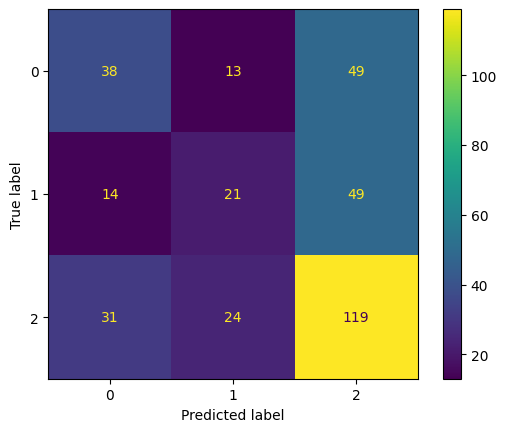

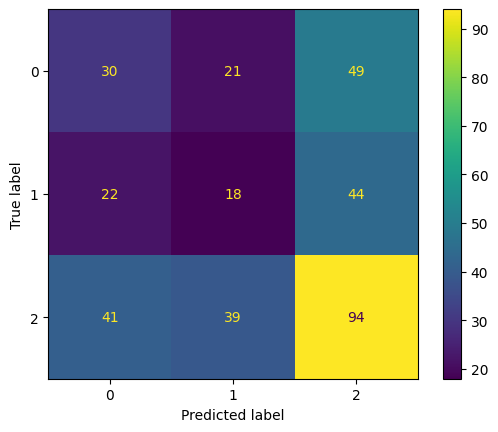

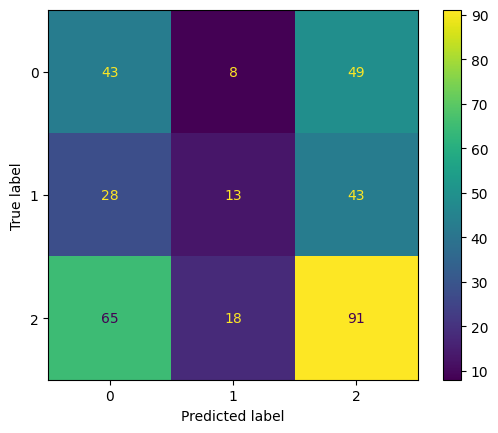

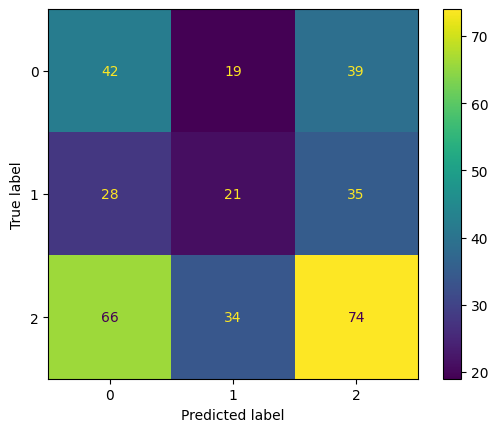

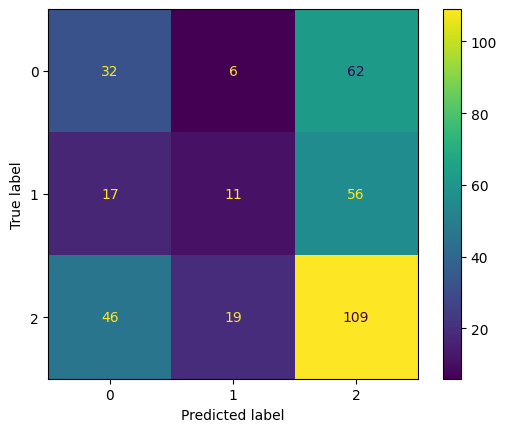

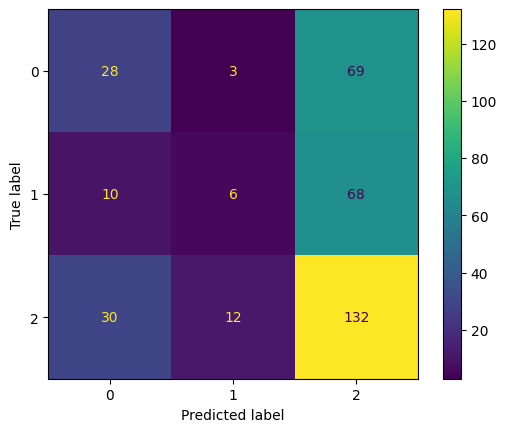

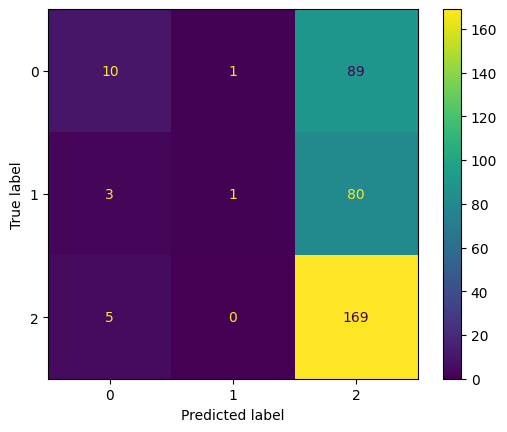

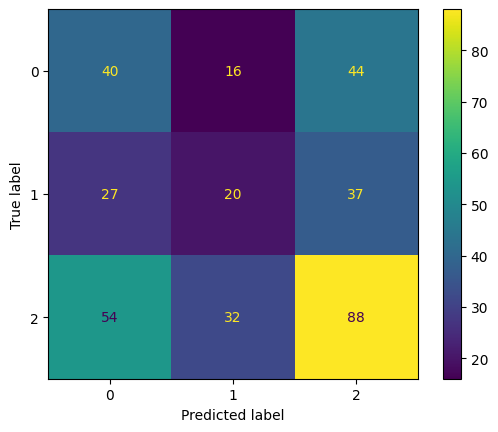

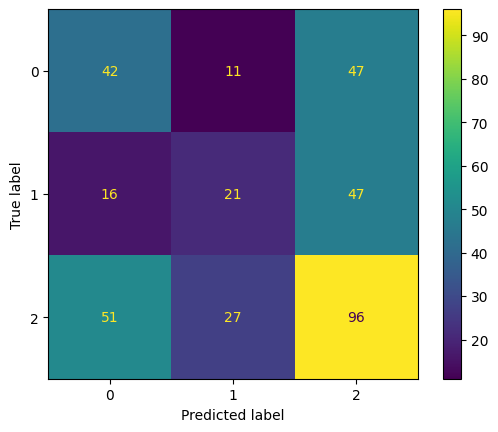

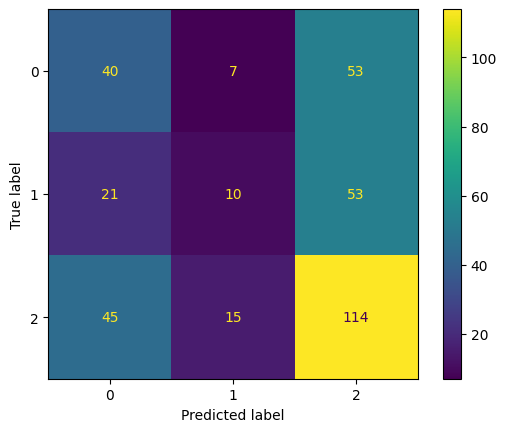

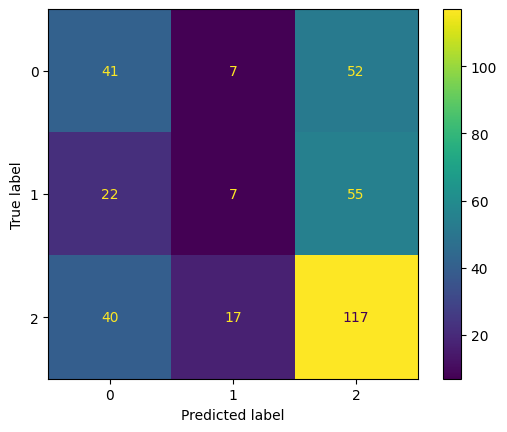

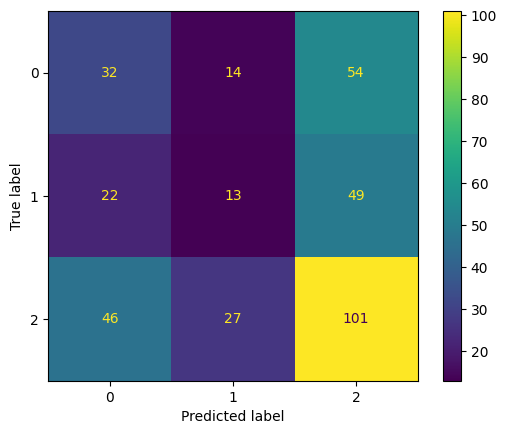

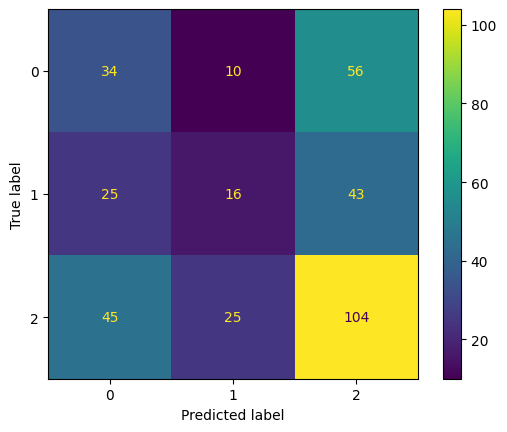

In [51]:
for classifier, name in classifiers:
    print(f"Training {name}")
    model_metrics = evaluate_classifier(classifier, X, y)
    cm = metrics.ConfusionMatrixDisplay(
        confusion_matrix=model_metrics["confusion_matrix"]
    ).plot()
    track_model(
        classifier,
        name,
        log_model=False,
        model_metrics=model_metrics,
        params={
            "dataset_size": num_samples,
            "scaled": scaled,
            "history_feature": history_feature,
        },
        figures={"confusion_matrix": cm.figure_},
    )

_______

### Inference

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2024)

In [53]:
model = LogisticRegression(max_iter=10000, random_state=2024)

In [54]:
trained_model = model.fit(X_train, y_train)

In [55]:
classifier_name = "log_reg_def"


# Log the model
model_info = mlflow.sklearn.log_model(
    sk_model=trained_model,
    artifact_path=classifier_name+"_artifact",
    # signature=signature,
    input_example=X,
    registered_model_name=classifier_name)

https://dagshub.com:443 "POST /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/create HTTP/11" 200 None
c:\Users\josem\ds\laliga-oracle\env_laliga\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/runs/get?run_uuid=1f35822d627547c0

In [83]:
y_pred = trained_model.predict(X_test)

In [84]:
trained_model.score(X_test, y_test)

0.5333333333333333

In [86]:
import pickle
filename = 'log_reg_v1.sav'

In [87]:
pickle.dump(trained_model, open(filename, 'wb'))

In [10]:
import pickle
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(f"./backend/models/{filename}", 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [11]:
loaded_model.classes_

array([0, 1, 2])

In [60]:
X_test['team_home_531'].iloc[0]

0.0

In [56]:
# Load MLflow model
import mlflow.sklearn


In [57]:
test = mlflow.sklearn.load_model("models:/log_reg_def/1")

https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow/model-versions/get-download-uri?name=log_reg_def&version=1 HTTP/11" 200 None
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts?path=620ba81b100844bd829f3fedcdac3aab%2F1f35822d627547c0abb1225f9b7426da%2Fartifacts%2Flog_reg_def_artifact HTTP/11" 200 None
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts?path=620ba81b100844bd829f3fedcdac3aab%2F1f35822d627547c0abb1225f9b7426da%2Fartifacts%2Flog_reg_def_artifact HTTP/11" 200 None
Starting new HTTPS connection (2): dagshub.com:443
Starting new HTTPS connection (3): dagshub.com:443
Starting new HTTPS connection (4): dagshub.com:443
Starting new HTTPS connection (5): dagshub.com:443
Starting new HTTPS connection (6): dagshub.com:443
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts/620ba81b100844bd829f3fedcdac3aab

In [70]:
sk_model = mlflow.sklearn.load_model("mlflow-artifacts:/620ba81b100844bd829f3fedcdac3aab/a2f711cd2e5a468f83945402e745506b/artifacts/Logistic Regression artifact")

https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts?path=620ba81b100844bd829f3fedcdac3aab%2Fa2f711cd2e5a468f83945402e745506b%2Fartifacts%2FLogistic+Regression+artifact HTTP/11" 200 None
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts?path=620ba81b100844bd829f3fedcdac3aab%2Fa2f711cd2e5a468f83945402e745506b%2Fartifacts%2FLogistic+Regression+artifact HTTP/11" 200 None
Resetting dropped connection: dagshub.com
Resetting dropped connection: dagshub.com
Resetting dropped connection: dagshub.com
Resetting dropped connection: dagshub.com
Resetting dropped connection: dagshub.com
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/mlflow-artifacts/artifacts/620ba81b100844bd829f3fedcdac3aab/a2f711cd2e5a468f83945402e745506b/artifacts/Logistic%20Regression%20artifact/requirements.txt HTTP/11" 200 None
https://dagshub.com:443 "GET /josmunpen/laliga-oracle-dags.mlflow/api/2.0/m

In [71]:
sk_model

LogisticRegression(max_iter=10000, random_state=2024)

In [74]:
predictions = sk_model.predict(X_test.iloc[0].values.reshape(1, -1))

c:\Users\josem\ds\laliga-oracle\env_laliga\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [76]:
predictions = sk_model.predict_proba(X_test.iloc[0].values.reshape(1, -1))

c:\Users\josem\ds\laliga-oracle\env_laliga\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [77]:
predictions

array([[0.04450971, 0.73681219, 0.2186781 ]])

_______________

### WIP

In [101]:
from backend.utils.utils import get_team_data, get_match_data

In [123]:
import pickle

In [124]:
team_home = 531
team_away = 532

In [128]:
df_match = get_match_data(team_home, team_away)

In [164]:
df_match = pd.concat([df_match, ohe_encoded], axis=1).drop(columns=ohe_cols)

In [78]:
from sklearn.pipeline import make_pipeline

In [116]:
pipe = make_pipeline(OneHotEncoder())